In [46]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import os   
import random
import math
import seaborn as sns
import scipy.stats as stats
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from faker import Faker

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

## Cities

In [68]:
cities = pd.read_csv('\\Users\\Andrea\\CSV\\cities_by_gdp.csv')
cities.head()

,Index,Metropolitian Area/City,Country/Region,Official est. GDP(billion US$),Metropolitian Population
0,1,A Coruña metropolitan area,Spain,28.819,"1,121,815"
1,2,Aachen,Germany,24.296,"249,070"
2,3,Aalborg,Denmark,31.855,"219,487"
3,4,Aarhus,Denmark,54.927,"352,751"
4,5,"Abbotsford, British Columbia",Canada,6.239,"203,907"


In [69]:
cities.shape

(903, 5)

In [70]:
cities.dtypes

Index                              int64
Metropolitian Area/City           object
Country/Region                    object
Official est. GDP(billion US$)    object
Metropolitian Population          object
dtype: object

In [71]:
cities.describe()

,Index
count,903.000000
mean,452.000000
std,260.817944
min,1.000000
25%,226.500000
50%,452.000000
75%,677.500000
max,903.000000


## Cleaning data

In [72]:
GDP = cities['Official est. GDP(billion US$)']
GDP = GDP.str.replace(".", "")
GDP = GDP.str.replace(",", "")
cities['Official est. GDP(billion US$)'] = GDP
cities.head(16)

C:\Users\Andrea\AppData\Local\Temp\ipykernel_12932\3565950586.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  GDP = GDP.str.replace(".", "")


,Index,Metropolitian Area/City,Country/Region,Official est. GDP(billion US$),Metropolitian Population
0,1,A Coruña metropolitan area,Spain,28819,"1,121,815"
1,2,Aachen,Germany,24296,"249,070"
2,3,Aalborg,Denmark,31855,"219,487"
3,4,Aarhus,Denmark,54927,"352,751"
4,5,"Abbotsford, British Columbia",Canada,6239,"203,907"
5,6,"Aberdeen, Scotland",United Kingdom,230,"489,840"
6,7,Abidjan,Ivory Coast,27,"5,600,000"
7,8,"Abilene, TX MSA",United States,9469,"179,308"
8,9,Abu Dhabi metropolitan area,United Arab Emirates,151073,"1,660,000"
9,10,Adelaide,Australia,64461,"1,344,368"


In [73]:
population = cities['Metropolitian Population']
population = population.str.replace(",", "")
cities['Metropolitian Population'] = population
cities.head(16)

,Index,Metropolitian Area/City,Country/Region,Official est. GDP(billion US$),Metropolitian Population
0,1,A Coruña metropolitan area,Spain,28819,1121815
1,2,Aachen,Germany,24296,249070
2,3,Aalborg,Denmark,31855,219487
3,4,Aarhus,Denmark,54927,352751
4,5,"Abbotsford, British Columbia",Canada,6239,203907
5,6,"Aberdeen, Scotland",United Kingdom,230,489840
6,7,Abidjan,Ivory Coast,27,5600000
7,8,"Abilene, TX MSA",United States,9469,179308
8,9,Abu Dhabi metropolitan area,United Arab Emirates,151073,1660000
9,10,Adelaide,Australia,64461,1344368


In [74]:
cities.dtypes

Index                              int64
Metropolitian Area/City           object
Country/Region                    object
Official est. GDP(billion US$)    object
Metropolitian Population          object
dtype: object

In [75]:
cities['Metropolitian Population'] = cities['Metropolitian Population'].astype(str).astype(int)
cities['Official est. GDP(billion US$)'] = cities['Official est. GDP(billion US$)'].astype(str).astype(int)

In [76]:
cities.dtypes

Index                              int64
Metropolitian Area/City           object
Country/Region                    object
Official est. GDP(billion US$)     int32
Metropolitian Population           int32
dtype: object

In [77]:
cities.describe()

,Index,Official est. GDP(billion US$),Metropolitian Population
count,903.000000,9.030000e+02,9.030000e+02
mean,452.000000,6.183172e+04,2.273056e+06
std,260.817944,1.576922e+05,4.270778e+06
min,1.000000,6.000000e+00,5.610000e+02
25%,226.500000,7.871000e+03,2.129595e+05
50%,452.000000,1.920200e+04,5.640240e+05
75%,677.500000,4.766350e+04,2.418908e+06
max,903.000000,2.163208e+06,4.070000e+07


## Graphs

<Axes: >

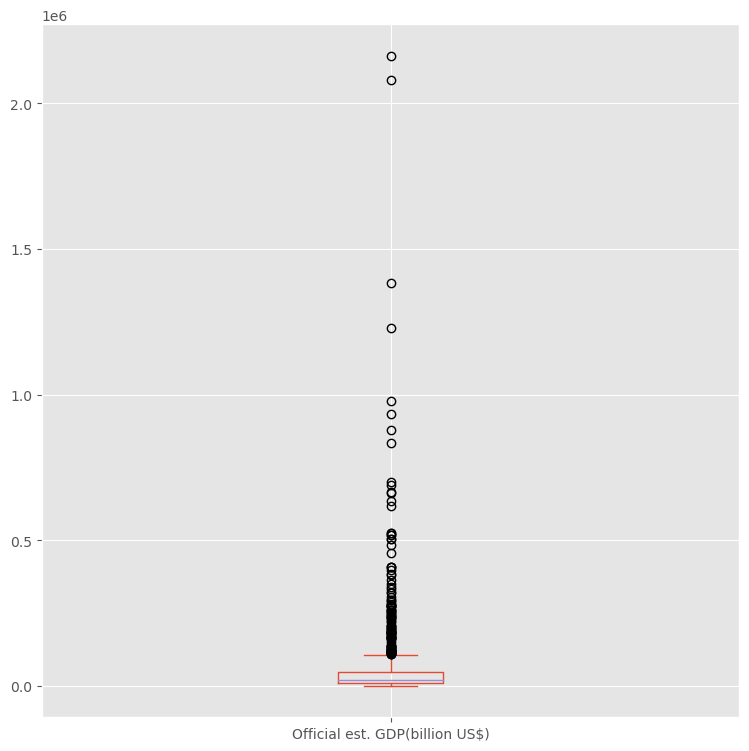

In [78]:
cities['Official est. GDP(billion US$)'].plot(kind="box",figsize=(9,9))

<Axes: >

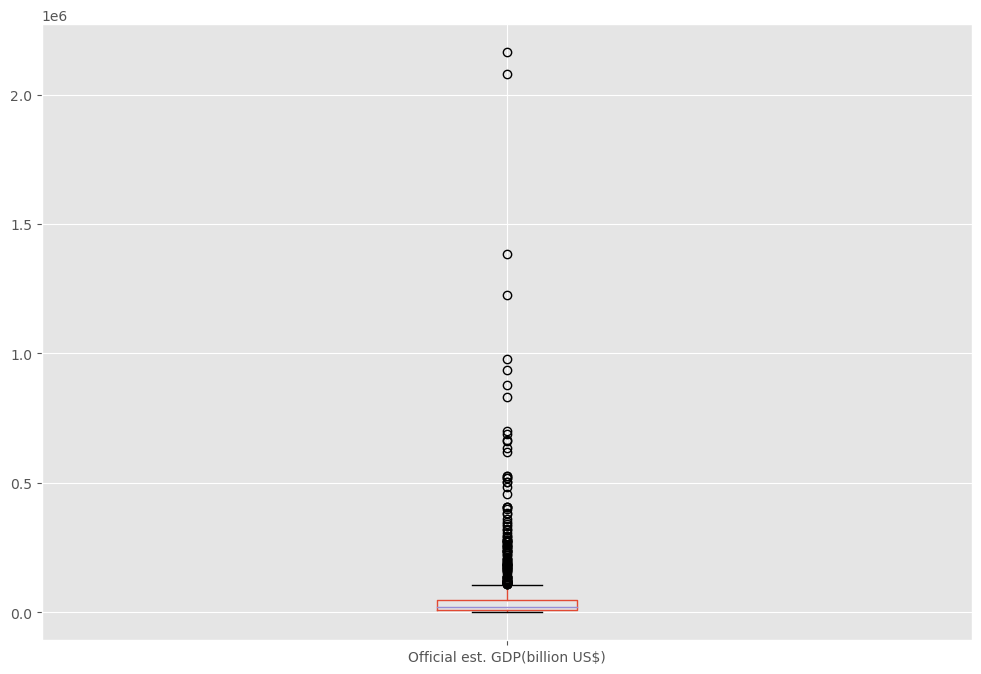

In [79]:
cities.boxplot(column = "Official est. GDP(billion US$)")

In [80]:
belgium = cities[cities["Country/Region"] == "Belgium"]
belgium

,Index,Metropolitian Area/City,Country/Region,Official est. GDP(billion US$),Metropolitian Population
36,37,Antwerp metropolitan area,Belgium,66063,1230000
113,114,Brussels metropolitan area,Belgium,23708,2784967
150,151,Charleroi,Belgium,1693,396820
269,270,Ghent metropolitan area,Belgium,39015,561524
459,460,Liège,Belgium,31085,500903
557,558,Namur metropolitan area,Belgium,12559,319355


<Axes: title={'center': 'Official est. GDP(billion US$)'}, xlabel='Metropolitian Area/City'>

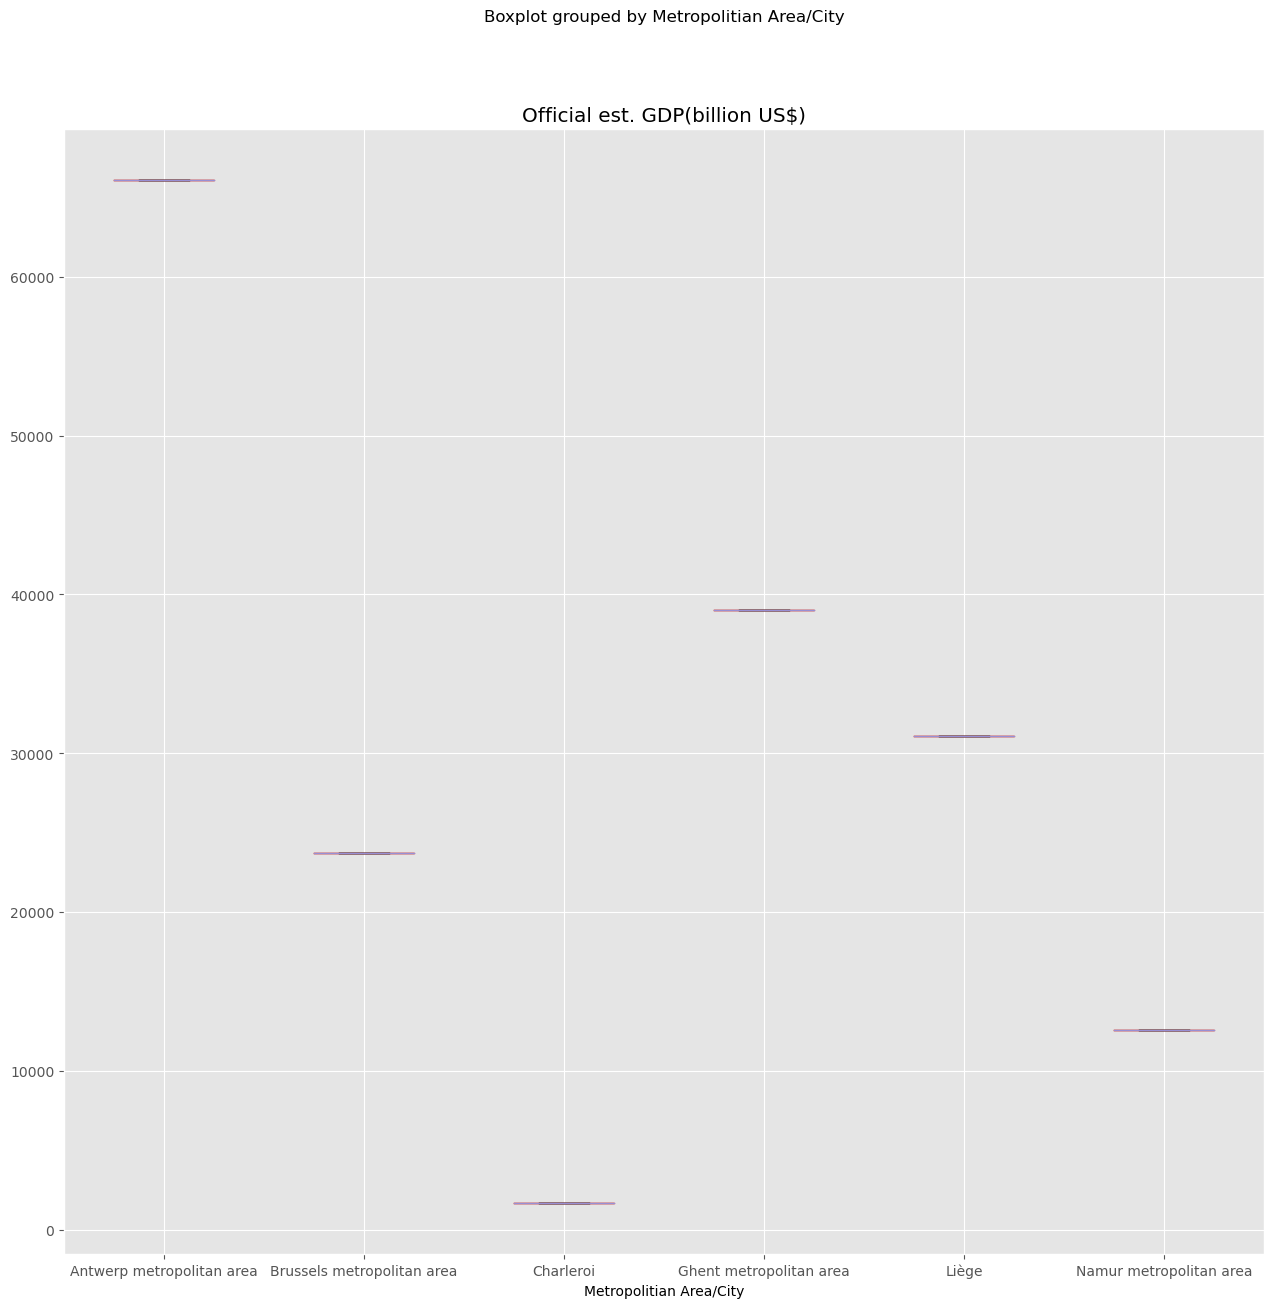

In [81]:
belgium.boxplot(column="Official est. GDP(billion US$)", by="Metropolitian Area/City", figsize=(15,15) )

<Axes: >

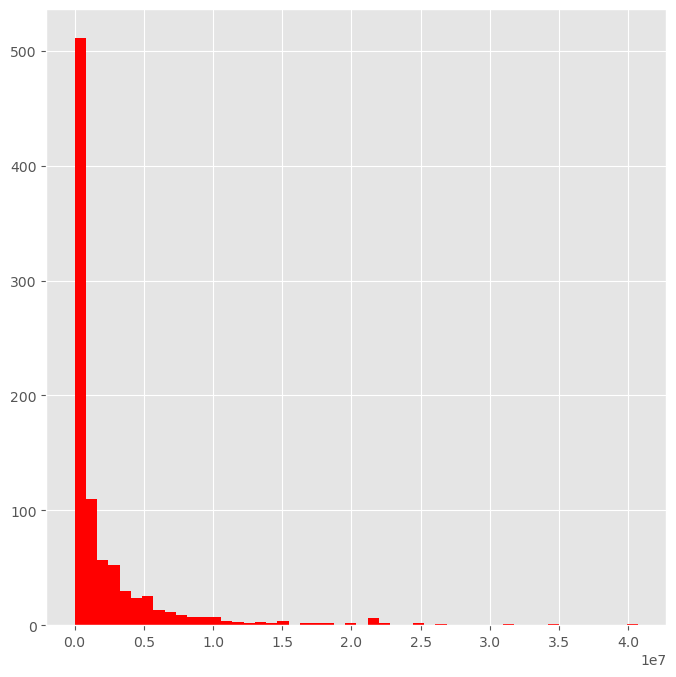

In [82]:
cities['Metropolitian Population'].hist(figsize=(8,8), color='red', bins=50, )

In [84]:
countries = pd.crosstab(index=cities["Country/Region"], columns="count")
countries

col_0,count
Country/Region,
Afghanistan,1
Argentina,1
Armenia,1
Australia,23
Austria,5
...,...
United Kingdom,13
United States,382
Uruguay,1


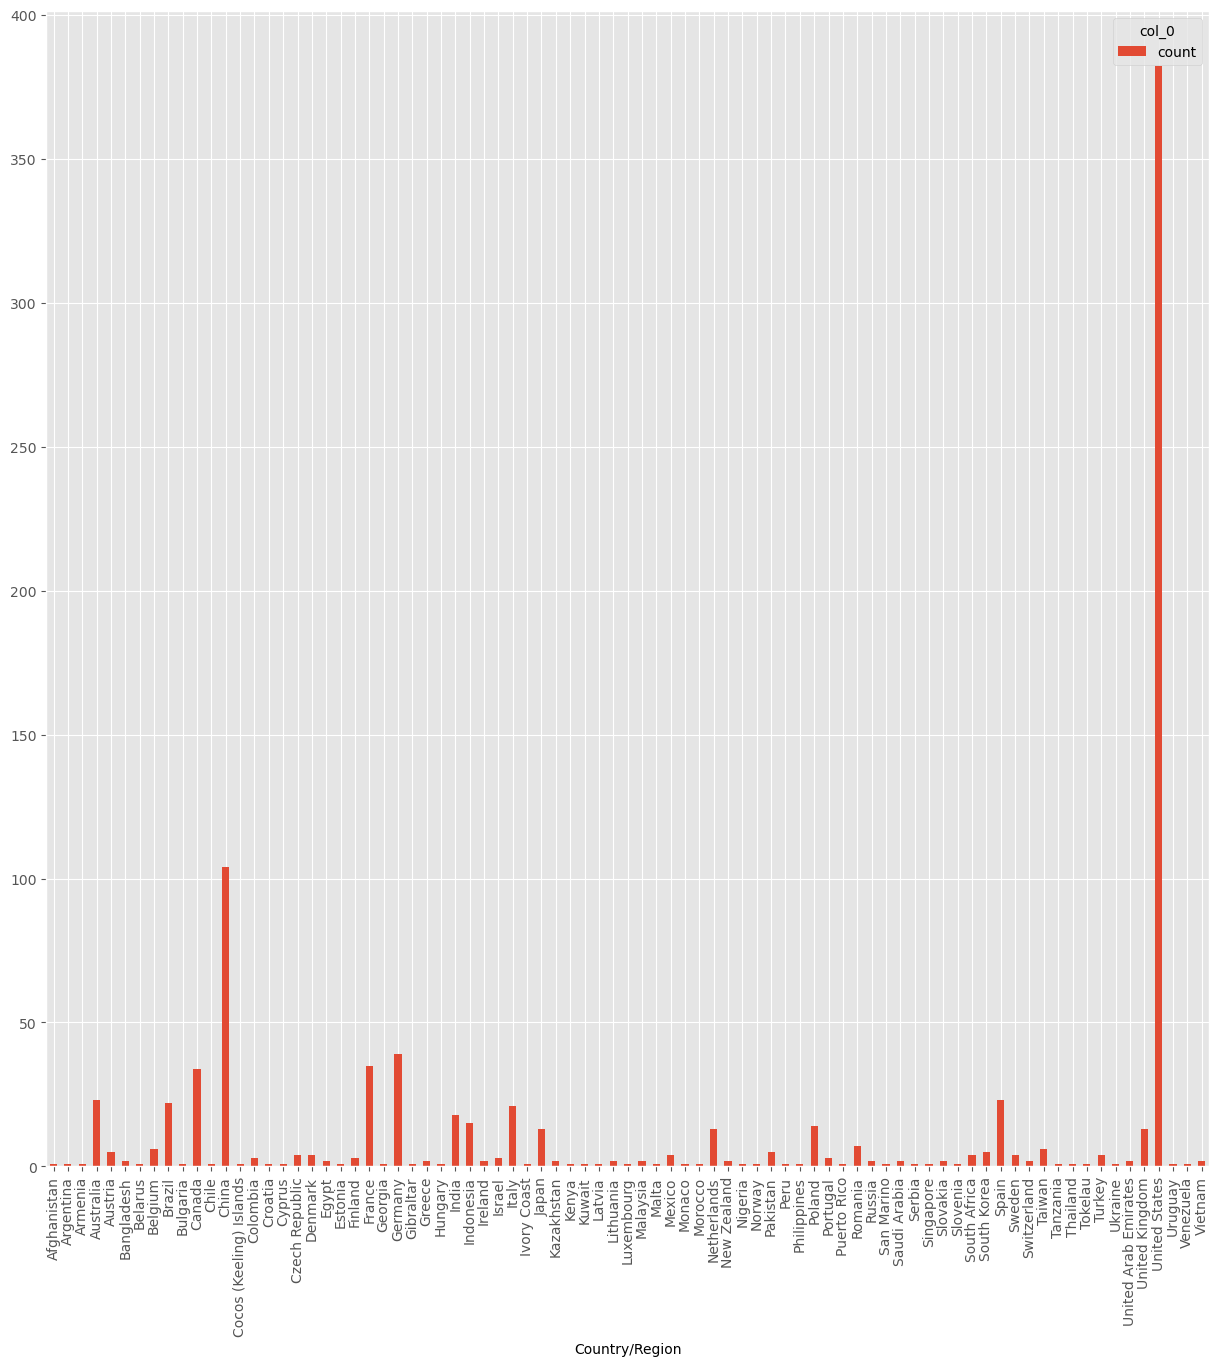

In [85]:
countries.plot(kind="bar", figsize=(15,15));

<Axes: xlabel='Metropolitian Population', ylabel='Official est. GDP(billion US$)'>

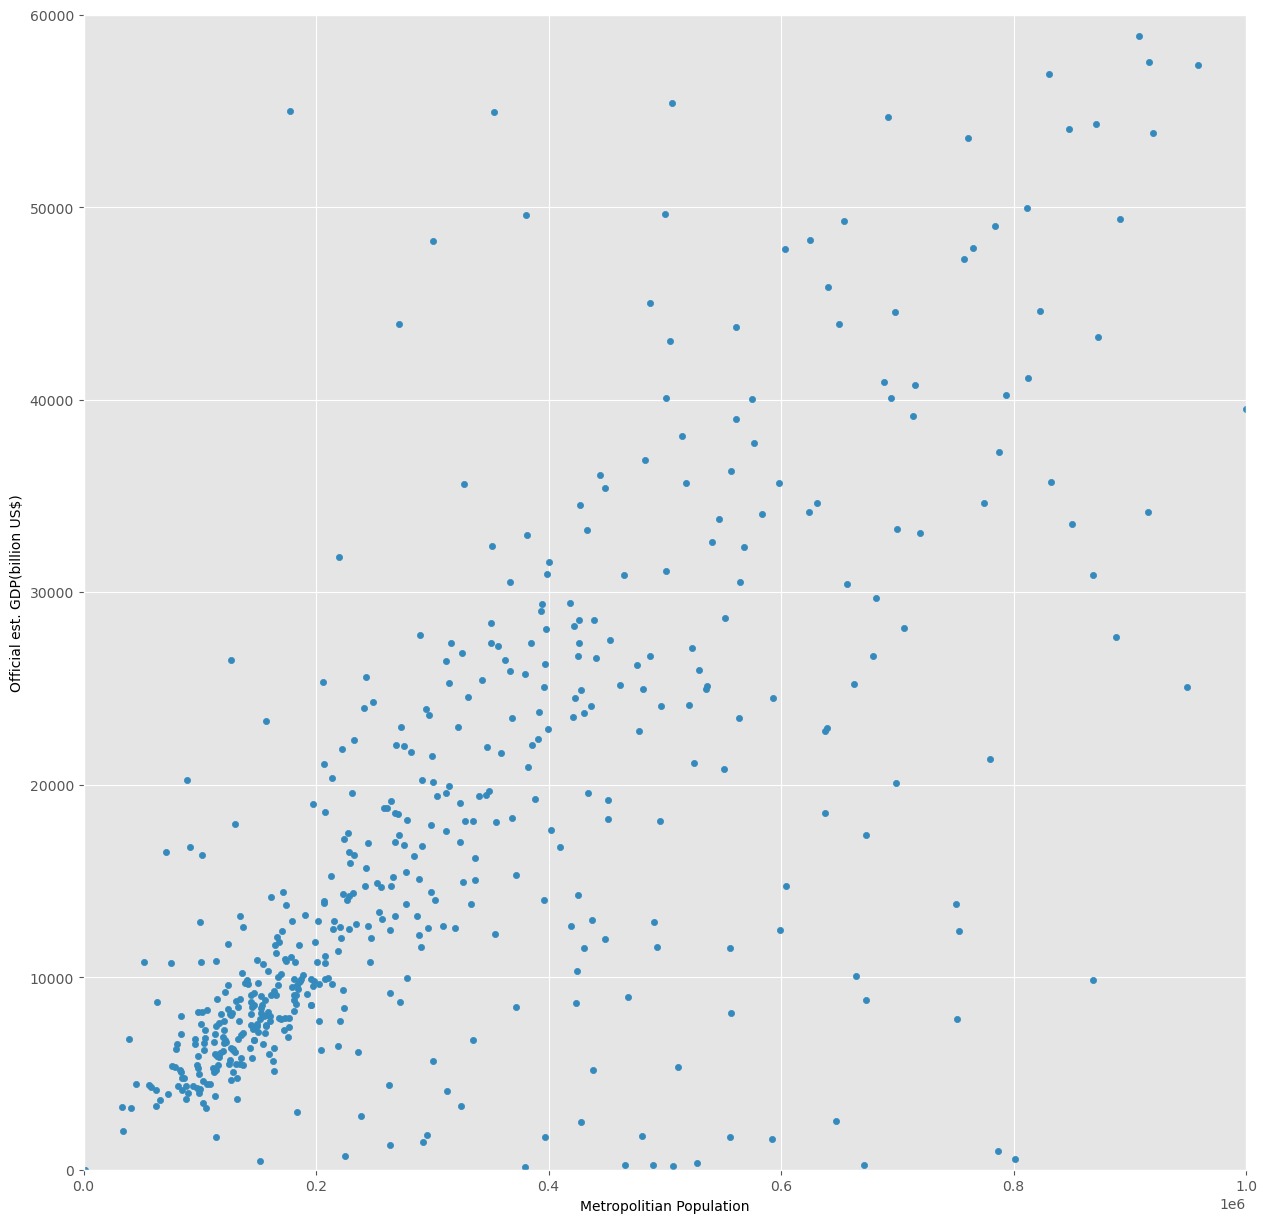

In [86]:
pop_vs_GDP = cities.plot(kind="scatter",     # Create a scatterplot
              x="Metropolitian Population",          # Put carat on the x axis
              y="Official est. GDP(billion US$)",          # Put price on the y axis
              figsize=(15,15),
              ylim=(0,60000),
              xlim=(0,1000000));
pop_vs_GDP

## Correlation

In [91]:
df_numerized = cities

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,Index,Metropolitian Area/City,Country/Region,Official est. GDP(billion US$),Metropolitian Population
0,1,0,66,28819,1121815
1,2,1,24,24296,249070
2,3,2,18,31855,219487
3,4,3,18,54927,352751
4,5,4,10,6239,203907


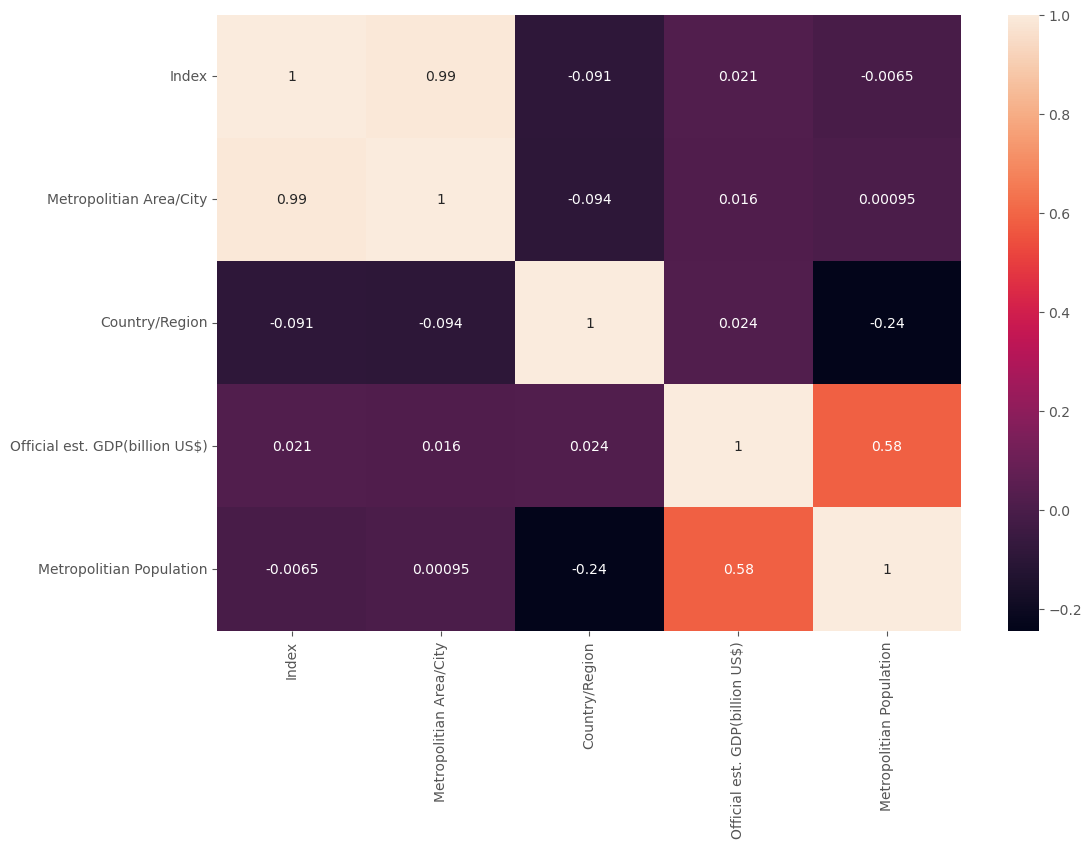

In [92]:
correlation_matrix = df_numerized.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

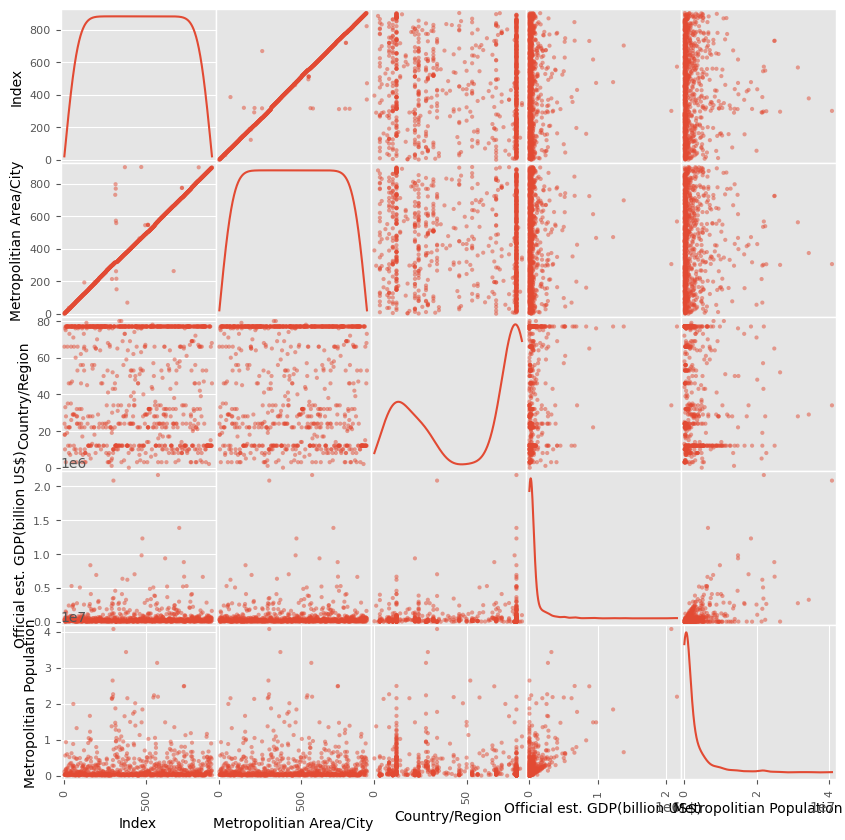

In [93]:
from pandas.plotting import scatter_matrix

scatter_matrix(cities.iloc[:,0:6], # Make a scatter matrix of 6 columns
               figsize=(10, 10),   # Set plot size
               diagonal='kde');    # Show distribution estimates on diagonal

## Linear regression

In [94]:
# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the mtcars data
regression_model.fit(X = pd.DataFrame(cities["Metropolitian Population"]), 
                     y = cities["Official est. GDP(billion US$)"])

# Check trained model y-intercept
print(regression_model.intercept_)

# Check trained model coefficients
print(regression_model.coef_)

12814.832029004247
[0.02156431]


In [95]:
train_prediction = regression_model.predict(X = pd.DataFrame(cities["Metropolitian Population"]))

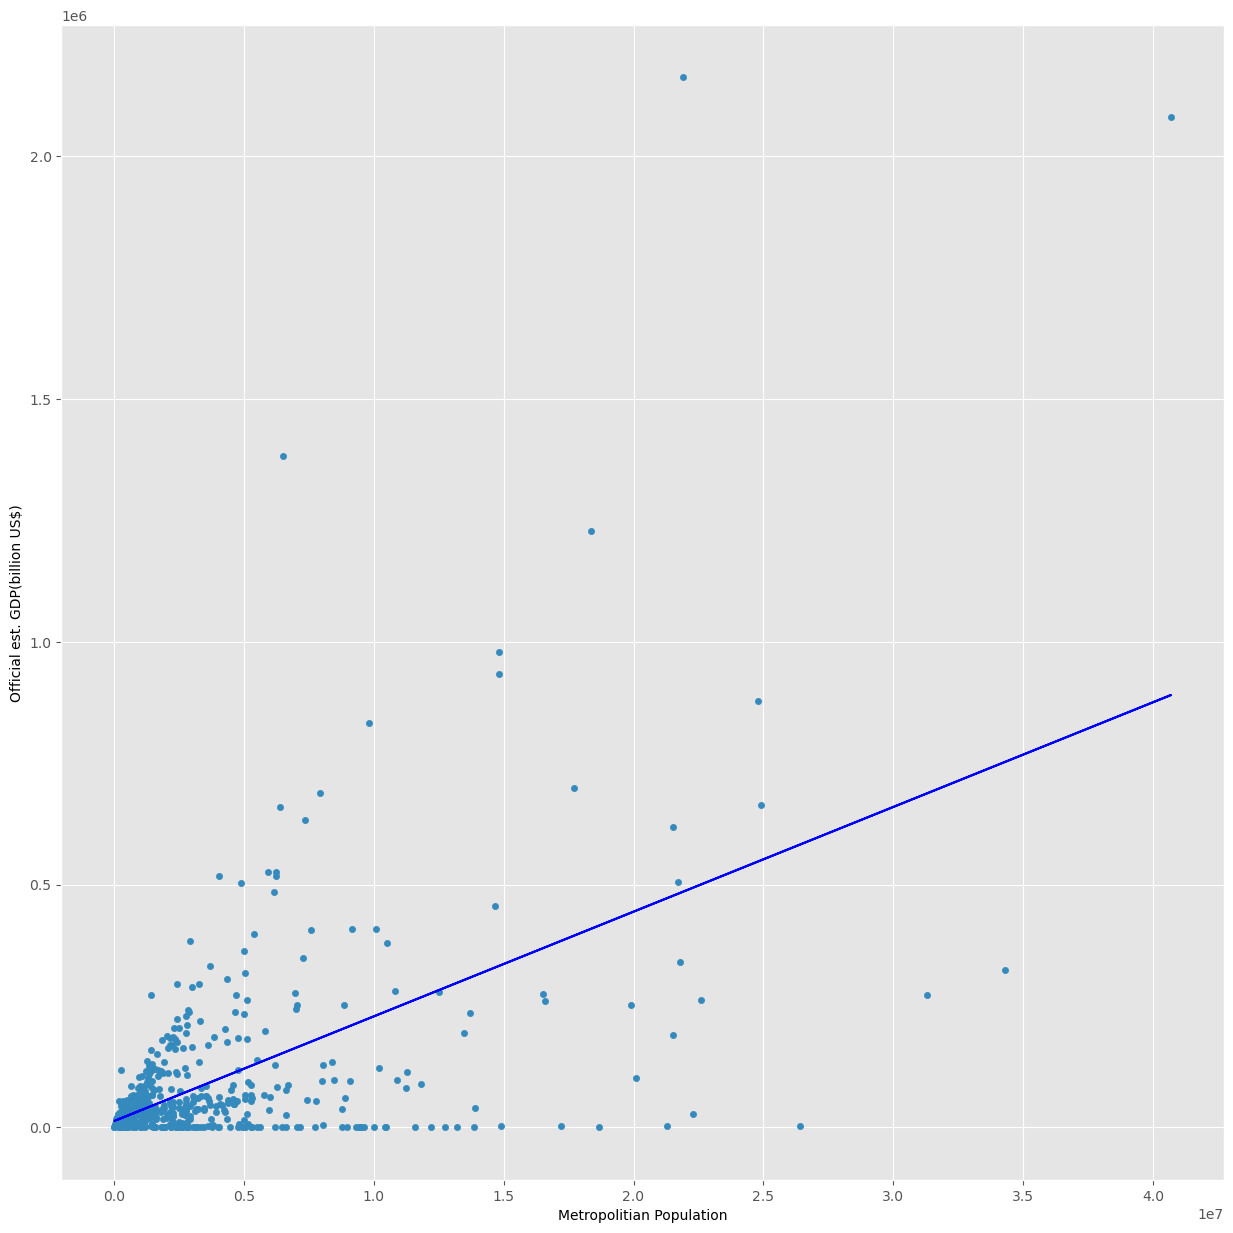

In [96]:
cities.plot(kind="scatter",     # Create a scatterplot
              x="Metropolitian Population",          # Put carat on the x axis
              y="Official est. GDP(billion US$)",          # Put price on the y axis
              figsize=(15,15))

# Plot regression line
plt.plot(cities["Metropolitian Population"],      # Explanitory variable
         train_prediction,  # Predicted values
         color="blue");

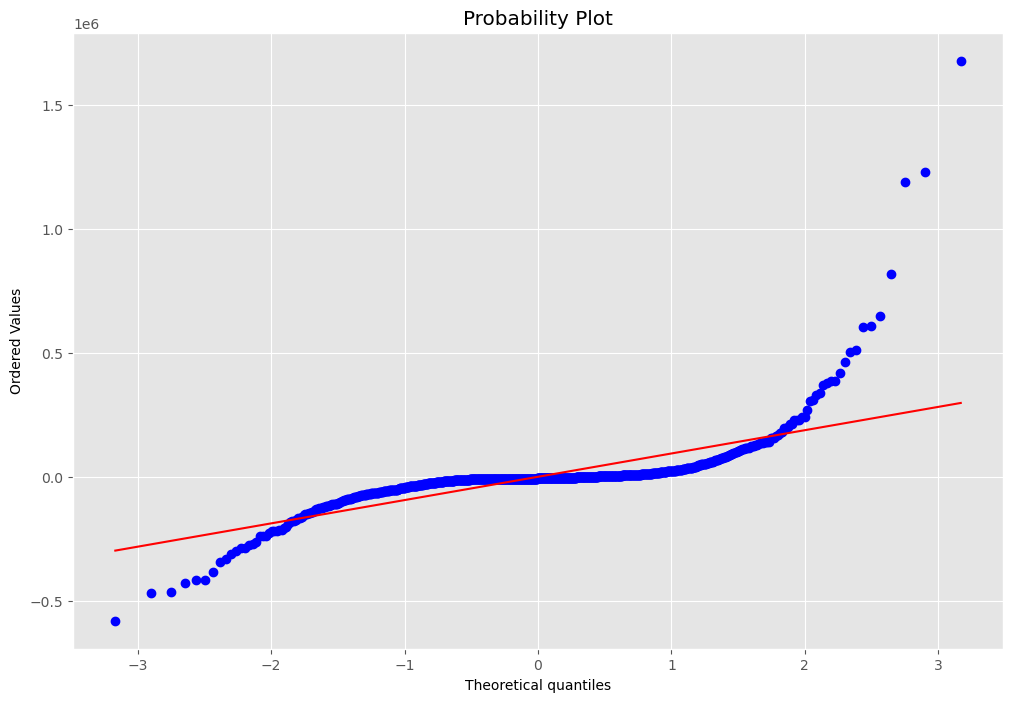

In [97]:
residuals = cities["Official est. GDP(billion US$)"] - train_prediction
stats.probplot(residuals, dist="norm", plot=plt);